# Домашнее задание по теме: пакет `matplotlib`

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

!pip -V

pip 20.3.3 from /home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/pip (python 3.8)


In [2]:
# !conda install numpy pandas matplotlib -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [6]:
# загрузить датасет в pandas dataframe
df = pd.read_csv("./../../data/hotel_bookings.csv")

# показать все колонки
pd.options.display.max_columns = None

# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Задание

- Далее в заданиях будут использованы сокращенные называния с помощью `(=название)`. Это нужно для удобства описания.
- Можно использовать любые названия для переменных.
- Графики должны быть максимально похожи на заданное изображение, но не обязательно идентичными
(по желанию можно менять что-то сохраняя сложность построения изображения). Важные замечания будут даны в комментарии к конкретному графику (например: "использовать RGB цвета" значит ЛЮБЫЕ нестандартные цвета).
- Важно обращать внимание на размер изображения и пропорции.
- Каждый график необходимо сохранить в файл (в отдельную директорию). Формат можно выбрать любой, лучше использовать несколько различных.

## Подготовка данных

In [7]:
# добавить новый столбец (=all_days), который является суммой stays_in_week_nights (=weekdays) и stays_in_weekend_nights (=weekends)
df['stays_nights'] = df.stays_in_week_nights + df.stays_in_weekend_nights

In [8]:
# сгруппировать данные по lead_time (функция агрегации - среднее значение)
df_groupby_lead_time = df.groupby('lead_time').mean()

# сохранить в новую переменную сгруппированные значения для:
# all_days
stays_nights_lead_time = df_groupby_lead_time.stays_nights
# weekdays
stays_in_week_nights_lead_time = df_groupby_lead_time.stays_in_week_nights
# weekends
stays_in_weekend_nights_lead_time = df_groupby_lead_time.stays_in_weekend_nights

In [9]:
# сгруппировать данные по arrival_date_month (функция агрегации - сумма)
df_groupby_arrival_date_month = df.groupby('arrival_date_month').sum()

# сохранить в новую переменную сгруппированные значения для is_canceled (=month_canceled)
arrival_month_canceled = df_groupby_arrival_date_month.is_canceled

# сохранить в новую переменную сгруппированные значения для is_canceled ТОЛЬКО для летных месяцев (=summer_canceled)
arrival_summer_canceled = arrival_month_canceled[['July', 'June', 'August']]

## Графики (line plot)

### `Pyplot`-стиль

![](./images/09/line_plt.png)

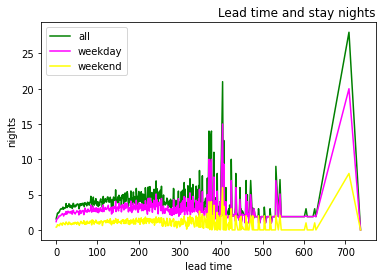

In [10]:
plt.plot(stays_nights_lead_time, 
         color='green', label='all')

plt.plot(stays_in_week_nights_lead_time, 
         color='magenta', label='weekday')

plt.plot(stays_in_weekend_nights_lead_time, 
         color='yellow', label='weekend')


plt.legend(loc='upper left')
plt.title(label='Lead time and stay nights', 
          loc='right')

plt.ylabel('nights')

plt.xlabel('lead time')

plt.savefig(fname='images/09/line_plt.png',
            format='png',
            bbox_inches='tight')

### ОО-стиль

**ВНИМАНИЕ**: важно не "слепить" изображения (наименования для осей `y` должны быть хорошо видны).

![](./images/09/line_oo.png)

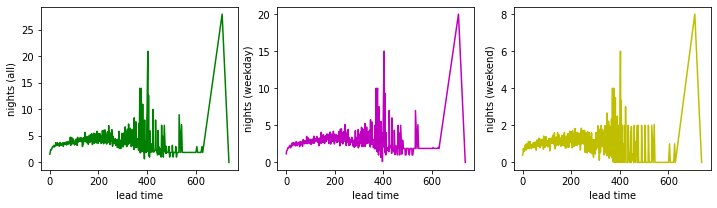

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].plot(stays_nights_lead_time, 'g')
ax[1].plot(stays_in_week_nights_lead_time, 'm')
ax[2].plot(stays_in_weekend_nights_lead_time, 'y')

ax[0].set_xlabel('lead time')
ax[1].set_xlabel('lead time')
ax[2].set_xlabel('lead time')

ax[0].set_ylabel('nights (all)')
ax[1].set_ylabel('nights (weekday)')
ax[2].set_ylabel('nights (weekend)')

plt.savefig(fname='images/09/line_oo.png',
            format='png',
            bbox_inches='tight')

## Диаграммы разброса (scatter plot)

### `Pyplot`-стиль

**ВНИМАНИЕ**: различный уровень прозрачности (`alpha`).

![](./images/09/scatter_plt.png)

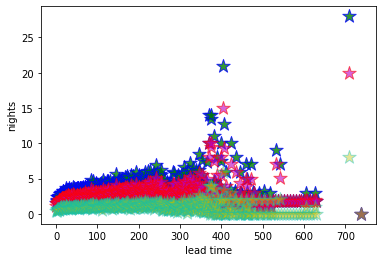

In [12]:
plt.scatter(x=stays_nights_lead_time.index, 
            y=stays_nights_lead_time, 
            marker='*', 
            color='g', 
            alpha=0.8, 
            edgecolors='b', 
            s=200, 
            label='all')

plt.scatter(x=stays_in_week_nights_lead_time.index, 
            y=stays_in_week_nights_lead_time, 
            marker='*', 
            color='m', 
            alpha=0.6, 
            edgecolors='r', 
            s=200,
            label='weekday')

plt.scatter(x=stays_in_weekend_nights_lead_time.index, 
            y=stays_in_weekend_nights_lead_time, 
            marker='*', 
            color='y', 
            alpha=0.4, 
            edgecolors='c', 
            s=200,
            label='weekend')

plt.ylabel('nights')

plt.xlabel('lead time')

plt.savefig(fname='images/09/scatter_plt.png',
            format='png',
            bbox_inches='tight')

### ОО-стиль

**ВНИМАНИЕ**: 
- различный уровень прозрачности (`alpha`).
- важно не "слепить" изображения (наименования для осей `x` должны быть хорошо видны).


![](./images/09/scatter_oo.png)

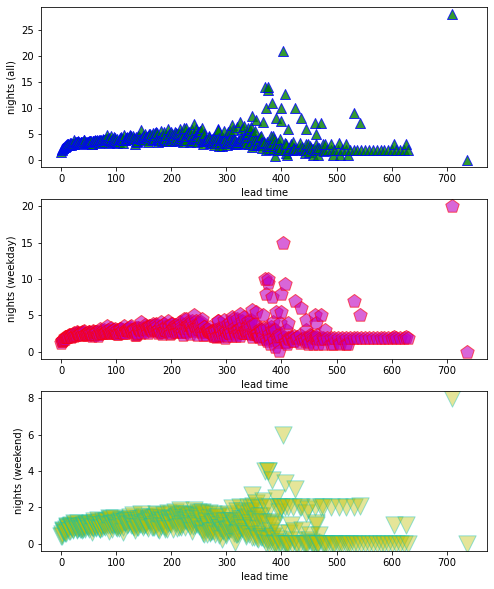

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

ax[0].scatter(x=stays_nights_lead_time.index, 
            y=stays_nights_lead_time, 
            marker='^', 
            color='g', 
            alpha=0.8, 
            edgecolors='b', 
            s=100, 
            label='all')

ax[1].scatter(x=stays_in_week_nights_lead_time.index, 
            y=stays_in_week_nights_lead_time, 
            marker='p', 
            color='m', 
            alpha=0.6, 
            edgecolors='r', 
            s=200,
            label='weekday')

ax[2].scatter(x=stays_in_weekend_nights_lead_time.index, 
            y=stays_in_weekend_nights_lead_time, 
            marker='v', 
            color='y', 
            alpha=0.4, 
            edgecolors='c', 
            s=300,
            label='weekend')

ax[0].set_xlabel('lead time')
ax[1].set_xlabel('lead time')
ax[2].set_xlabel('lead time')

ax[0].set_ylabel('nights (all)')
ax[1].set_ylabel('nights (weekday)')
ax[2].set_ylabel('nights (weekend)')

plt.savefig(fname='images/09/scatter_oo.png',
            format='png',
            bbox_inches='tight')

## Столбчатые диаграммы (bar chart)

### `Pyplot`-стиль

**ВНИМАНИЕ**: использовать RGB код.


![](./images/09/bar_plt.png)

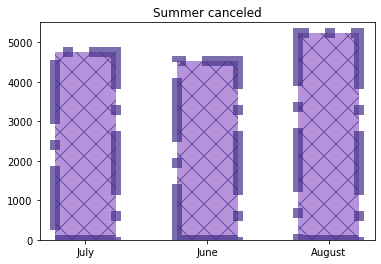

In [14]:
color_list = []

plt.bar(x=arrival_summer_canceled.index, 
        height=arrival_summer_canceled, 
        hatch='X', 
        color='#9966CC',
        edgecolor='#423189', 
        linestyle='-.', 
        alpha=0.7, 
        linewidth=10,  
        width=0.5)

plt.title('Summer canceled')

plt.savefig(fname='images/09/bar_plt.png',
            format='png',
            bbox_inches='tight')

### ОО-стиль

**ВНИМАНИЕ**: использовать RGB код.


![](./images/09/bar_oo.png)

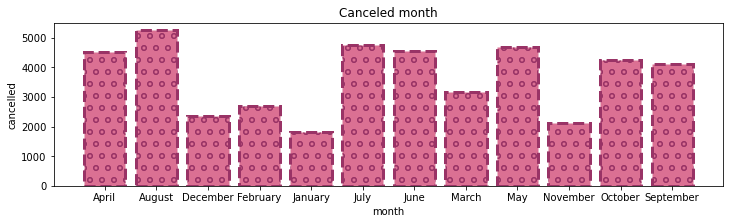

In [15]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.bar(x=arrival_month_canceled.index, 
       height=arrival_month_canceled, 
       color='#DB7093', 
       edgecolor='#993366', 
       linewidth=3, hatch='o', linestyle='--')

ax.set_xlabel('month')
ax.set_ylabel('cancelled')

ax.set_title("Canceled month")

plt.savefig(fname='images/09/bar_oo.png',
            format='png',
            bbox_inches='tight')

## Гистограммы (histogram)

### `Pyplot`-стиль

**ВНИМАНИЕ**: различный уровень прозрачности (`alpha`).

![](./images/09/hist_plt.png)

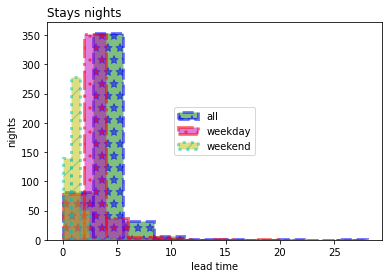

In [16]:
plt.hist(stays_nights_lead_time, 
         color='g', 
         alpha=0.5, 
         edgecolor='b',
         hatch='*',
         linestyle="--",
         linewidth=3,
         label='all')

plt.hist(stays_in_week_nights_lead_time, 
         color='m', 
         alpha=0.5, 
         edgecolor='r', 
         hatch='.',
         linestyle="-.",
         linewidth=3,
         label='weekday')

plt.hist(stays_in_weekend_nights_lead_time, 
         color='y', 
         alpha=0.5, 
         edgecolor='c', 
         hatch='/',
         linestyle=":",
         linewidth=3,
         label='weekend')

plt.title(label='Stays nights', 
          loc='left')

plt.legend(loc='center')

plt.ylabel('nights')

plt.xlabel('lead time')

plt.savefig(fname='images/09/hist_plt.png',
            format='png',
            bbox_inches='tight')

### ОО-стиль

**ВНИМАНИЕ**: 
- различный уровень прозрачности (`alpha`).
- `ticks` должны быть одинаковыми для оси `x`.

![](./images/09/hist_oo.png)

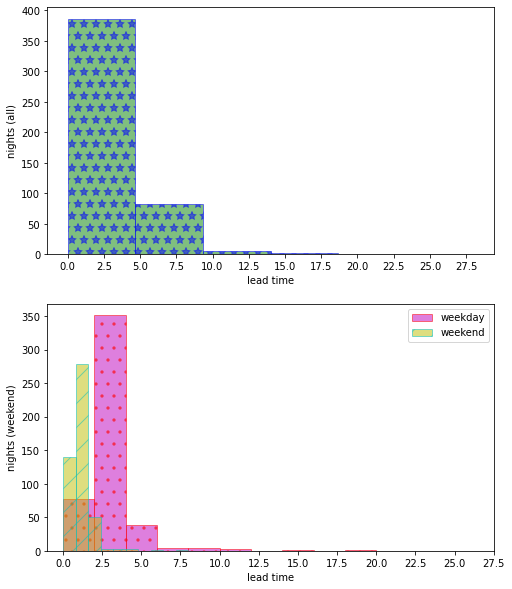

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

ax[0].hist(stays_nights_lead_time, 
           bins=6,
            hatch='*', 
            color='g', 
            alpha=0.5, 
            edgecolor='b', 
            label='all')

ax[1].hist(stays_in_week_nights_lead_time, 
            hatch='.', 
            color='m', 
            alpha=0.5, 
            edgecolor='r', 
            label='weekday')

ax[1].hist(stays_in_weekend_nights_lead_time, 
            hatch='/', 
            color='y', 
            alpha=0.5, 
            edgecolor='c', 
            label='weekend')

ax[0].set_xlabel('lead time')
ax[1].set_xlabel('lead time')
ax[1].set_xlabel('lead time')

ax[0].set_ylabel('nights (all)')
ax[1].set_ylabel('nights (weekday)')
ax[1].set_ylabel('nights (weekend)')

xticks_range = np.arange(stays_nights_lead_time.min(), 
                         stays_nights_lead_time.max() + 1, 
                         2.5)
ax[0].set_xticks(xticks_range)
ax[1].set_xticks(xticks_range)

ax[1].legend()

plt.savefig(fname='images/09/hist_oo.png',
            format='png',
            bbox_inches='tight')

## Круговые диаграммы (pie chart)

### `Pyplot`-стиль

**ВНИМАНИЕ**: выделить сектор с **Максимальным** процентом.

![](./images/09/pie_plt.png)

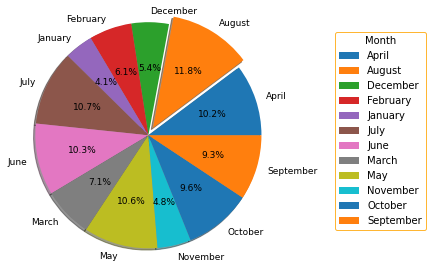

In [18]:
m = arrival_month_canceled.max()
explode_max = [0.1 if j == m else 0 for i, j in enumerate(arrival_month_canceled)]

plt.pie(x=arrival_month_canceled,
        labels=arrival_month_canceled.index,
        explode=explode_max,
        autopct='%1.1f%%', 
        radius=1.3, 
        textprops={'fontsize': 9}, 
        shadow=True)

plt.legend(title="Month",
           loc='best', 
           edgecolor='orange',
           bbox_to_anchor=(1.8, 1))

plt.savefig(fname='images/09/pie_plt.png',
            format='png',
            bbox_inches='tight')

### ОО-стиль

**ВНИМАНИЕ**:
- выделить сектор с **Минимальным** процентом.
- наименования секторов должны находится внутри.

![](./images/09/pie_oo.png)

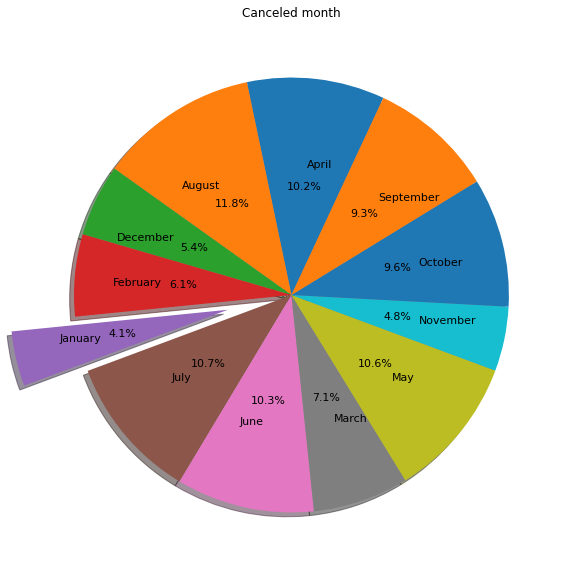

In [19]:
m = arrival_month_canceled.min()
explode_min = [0.3 if j == m else 0 for i, j in enumerate(arrival_month_canceled)]


fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(x=arrival_month_canceled,
       labels=arrival_month_canceled.index, 
       explode=explode_min,
       autopct='%1.1f%%',
       shadow=True, 
       startangle=65,
       labeldistance=0.6,
       pctdistance=0.5,
       textprops={'fontsize': 11})

ax.set_title("Canceled month")

plt.savefig(fname='images/09/pie_oo.png',
            format='png',
            bbox_inches='tight')

## Ствол-лист диаграммы (stem plot)

### `Pyplot`-стиль

**ВНИМАНИЕ**: "базовая линия" (`bottom`) - это медиана.

![](./images/09/stem_plt.png)

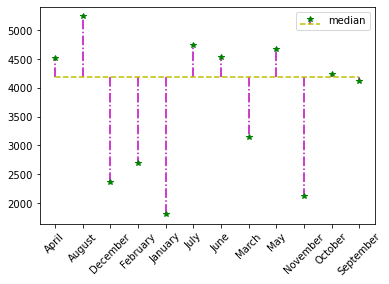

In [20]:
base = arrival_month_canceled.median()
base

plt.stem(arrival_month_canceled.index, 
         arrival_month_canceled,
         label='median',
         linefmt="m-.",
         markerfmt="g*",
         basefmt='y--',
         bottom=base)

plt.xticks(rotation=45)

plt.legend(loc='best')

plt.savefig(fname='images/09/stem_plt.png',
            format='png',
            bbox_inches='tight')

### ОО-стиль

**ВНИМАНИЕ**: "базовая линия" (`bottom`) - это медиана.

![](./images/09/stem_oo.png)

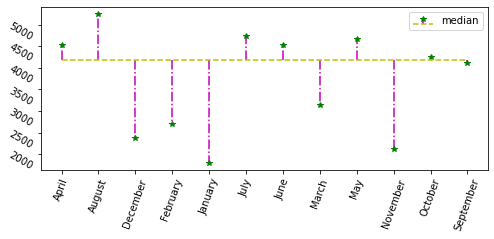

In [21]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.stem(arrival_month_canceled.index, 
        arrival_month_canceled,
        label='median',
        linefmt="m-.",
        markerfmt="g*",
        basefmt='y--',
        bottom=base)


ax.xaxis.set_tick_params(which='both', rotation=70)
ax.yaxis.set_tick_params(which='both', rotation=-30)

ax.legend(loc='best')

plt.savefig(fname='images/09/stem_oo.png',
            format='png',
            bbox_inches='tight')

## Ящик с усами (Box Plot)

### `Pyplot`-стиль

**ВНИМАНИЕ**: особый стиль для отображения выбросов (outliers)

![](./images/09/box_plt.png)

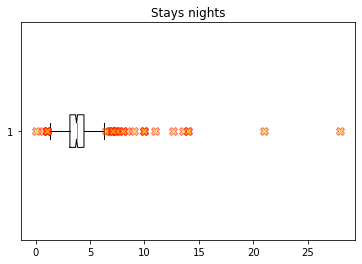

In [22]:
outliers = dict(marker='X',
                         markerfacecolor='orange',
                         markeredgecolor='r',
                         markersize=8, 
                         alpha=0.5)

plt.boxplot(stays_nights_lead_time, 
            notch=True, 
            vert=False,
            flierprops=outliers)

plt.title(label='Stays nights', 
          loc='center')

plt.savefig(fname='images/09/box_plt.png',
            format='png',
            bbox_inches='tight')

### ОО-стиль

**ВНИМАНИЕ**: особый стиль для отображения выбросов (outliers)

![](./images/09/box_oo.png)

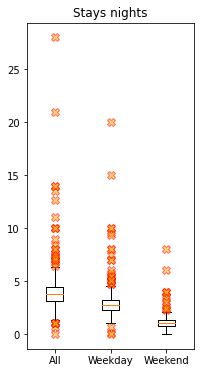

In [23]:
fig, ax = plt.subplots(figsize=(3, 6))

day_type_data = {'All': stays_nights_lead_time,
                 'Weekday': stays_in_week_nights_lead_time, 
                 'Weekend':stays_in_weekend_nights_lead_time}

ax.boxplot(day_type_data.values(), 
           flierprops=outliers)

ax.set_xticklabels(day_type_data.keys())

plt.title(label='Stays nights', 
          loc='center')

plt.savefig(fname='images/09/box_oo.png',
            format='png',
            bbox_inches='tight')